In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import scipy.sparse 
from scipy.sparse import hstack
from sklearn.preprocessing import StandardScaler
import dask.dataframe as dd
from dask.dataframe import from_pandas
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tqdm import tqdm
from prettytable import PrettyTable

In [4]:
df=pd.read_csv('/content/drive/MyDrive/feature_extracted')

In [5]:
df.columns

Index(['Unnamed: 0', 'comment_text', 'target', 'clean_text', 'asian',
       'atheist', 'bisexual', 'black', 'buddhist', 'christian', 'female',
       'heterosexual', 'hindu', 'homosexual_gay_or_lesbian',
       'intellectual_or_learning_disability', 'jewish', 'latino', 'male',
       'muslim', 'other_disability', 'other_gender', 'other_race_or_ethnicity',
       'other_religion', 'other_sexual_orientation', 'physical_disability',
       'psychiatric_or_mental_illness', 'transgender', 'white', 'length',
       'no_of_words', 'avg_word_length', 'caps', 'excl', 'sentence_count',
       'avg_sentence_length', 'sentiment', 'subjectivity', 'noun_count',
       'verb_count', 'adj_count', 'adv_count', 'pron_count'],
      dtype='object')

In [6]:
df_scraped=pd.read_csv('/content/drive/MyDrive/scraped_df')

In [7]:
columns=['length',
       'no_of_words', 'avg_word_length', 'caps', 'excl', 'sentence_count',
       'avg_sentence_length', 'sentiment', 'subjectivity', 'noun_count',
       'verb_count', 'adj_count', 'adv_count', 'pron_count']

In [10]:
df.columns

Index(['Unnamed: 0', 'comment_text', 'target', 'clean_text', 'asian',
       'atheist', 'bisexual', 'black', 'buddhist', 'christian', 'female',
       'heterosexual', 'hindu', 'homosexual_gay_or_lesbian',
       'intellectual_or_learning_disability', 'jewish', 'latino', 'male',
       'muslim', 'other_disability', 'other_gender', 'other_race_or_ethnicity',
       'other_religion', 'other_sexual_orientation', 'physical_disability',
       'psychiatric_or_mental_illness', 'transgender', 'white', 'length',
       'no_of_words', 'avg_word_length', 'caps', 'excl', 'sentence_count',
       'avg_sentence_length', 'sentiment', 'subjectivity', 'noun_count',
       'verb_count', 'adj_count', 'adv_count', 'pron_count'],
      dtype='object')

In [11]:
identity_columns = ['asian',
       'atheist', 'bisexual', 'black', 'buddhist', 'christian', 'female',
       'heterosexual', 'hindu', 'homosexual_gay_or_lesbian',
       'intellectual_or_learning_disability', 'jewish', 'latino', 'male',
       'muslim', 'other_disability', 'other_gender', 'other_race_or_ethnicity',
       'other_religion', 'other_sexual_orientation', 'physical_disability',
       'psychiatric_or_mental_illness', 'transgender', 'white']

In [12]:
def convert_to_bool(df, col_name):
    df[col_name] = np.where(df[col_name] >= 0.5, 1, 0)
    
def convert_dataframe_to_bool(df):
    bool_df = df.copy()
    for col in ['target'] + identity_columns:
        convert_to_bool(bool_df, col)
    return bool_df

df = convert_dataframe_to_bool(df)

In [13]:
print('df shape:',df.shape)
print('df_scraped shape:',df_scraped.shape)

df shape: (1783168, 42)
df_scraped shape: (14138, 18)


In [14]:
Y=df['target']
X=df.drop(['target'],axis=1)

In [15]:
X.shape

(1783168, 41)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.35, random_state=42,stratify=Y, shuffle=True)

In [17]:
X_train=X_train[['clean_text','length',
       'no_of_words', 'avg_word_length', 'caps', 'excl', 'sentence_count',
       'avg_sentence_length', 'sentiment', 'subjectivity', 'noun_count',
       'verb_count', 'adj_count', 'adv_count', 'pron_count']]

In [18]:
X_scraped=df_scraped.drop(['Unnamed: 0', 'text', 'target'],axis=1)
Y_scraped=df_scraped['target']

In [19]:

X_train_scrapped=pd.concat([X_train,X_scraped],axis=0)

In [20]:
y_train_scraped=pd.concat([y_train,Y_scraped],axis=0)

In [21]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1159059 entries, 1583997 to 754539
Data columns (total 15 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   clean_text           1159059 non-null  object 
 1   length               1159059 non-null  int64  
 2   no_of_words          1159059 non-null  int64  
 3   avg_word_length      1159059 non-null  float64
 4   caps                 1159059 non-null  int64  
 5   excl                 1159059 non-null  int64  
 6   sentence_count       1159059 non-null  int64  
 7   avg_sentence_length  1159059 non-null  float64
 8   sentiment            1159059 non-null  float64
 9   subjectivity         1159059 non-null  float64
 10  noun_count           1159059 non-null  int64  
 11  verb_count           1159059 non-null  int64  
 12  adj_count            1159059 non-null  int64  
 13  adv_count            1159059 non-null  int64  
 14  pron_count           1159059 non-null  int64 

In [22]:
X_train_scrapped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1173197 entries, 1583997 to 14137
Data columns (total 15 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   clean_text           1173197 non-null  object 
 1   length               1173197 non-null  int64  
 2   no_of_words          1173197 non-null  int64  
 3   avg_word_length      1173197 non-null  float64
 4   caps                 1173197 non-null  int64  
 5   excl                 1173197 non-null  int64  
 6   sentence_count       1173197 non-null  int64  
 7   avg_sentence_length  1173197 non-null  float64
 8   sentiment            1173197 non-null  float64
 9   subjectivity         1173197 non-null  float64
 10  noun_count           1173197 non-null  int64  
 11  verb_count           1173197 non-null  int64  
 12  adj_count            1173197 non-null  int64  
 13  adv_count            1173197 non-null  int64  
 14  pron_count           1173197 non-null  int64  

In [23]:
del df
del X
del Y
del df_scraped

# BoW

In [24]:
vectorizer = CountVectorizer(analyzer='word', ngram_range=(1, 1), max_features=100000)
vectorizer.fit(X_train['clean_text'])

CountVectorizer(max_features=100000)

In [25]:
X_train_bow_feature=vectorizer.transform(X_train['clean_text'])
X_test_bow_feature=vectorizer.transform(X_test['clean_text'])

In [26]:
vectorizer1 = CountVectorizer(analyzer='word', ngram_range=(1, 1), max_features=100000)
vectorizer1.fit(X_train_scrapped['clean_text'])

CountVectorizer(max_features=100000)

In [27]:
X_train_scraped_bow_feature=vectorizer1.transform(X_train_scrapped['clean_text'])
X_test_scraped_bow_feature=vectorizer1.transform(X_test['clean_text'])

In [28]:
feature_columns=['length', 'no_of_words',
       'avg_word_length', 'caps', 'excl', 'sentence_count',
       'avg_sentence_length', 'noun_count', 'verb_count',
       'adj_count', 'adv_count', 'pron_count', 'subjectivity']

In [29]:
X_train1=X_train[feature_columns]
X_test1=X_test[feature_columns]
X_train2=X_train_scrapped[feature_columns]

In [30]:
normalizer=Normalizer()
X_train1=normalizer.fit_transform(X_train1)
X_test1=normalizer.fit_transform(X_test1)
X_train2=normalizer.fit_transform(X_train2)

In [31]:
X_test1=pd.DataFrame(X_test1)

In [32]:
X_tr1 = hstack((X_train1, X_train_bow_feature)).tocsr()
X_tr2 = hstack((X_train2, X_train_scraped_bow_feature)).tocsr()
X_te1=hstack((X_test1, X_test_bow_feature)).tocsr()
X_te2=hstack((X_test1, X_test_scraped_bow_feature)).tocsr()

In [33]:
X_te_with_identity = hstack((X_test1, X_test_scraped_bow_feature,X_test[identity_columns])).tocsr()

In [34]:
print('X_tr1 shape:',X_tr1.shape)
print('X_tr2 shape:',X_tr2.shape)
print('X_te1 shape:',X_te1.shape)
print('X_te2 shape:',X_te2.shape)
print('y_train shape:',y_train.shape)
print('y_train_scraped shape:',y_train_scraped.shape)
print('y_test shape:',y_test.shape)

X_tr1 shape: (1159059, 100013)
X_tr2 shape: (1173197, 100013)
X_te1 shape: (624109, 100013)
X_te2 shape: (624109, 100013)
y_train shape: (1159059,)
y_train_scraped shape: (1173197,)
y_test shape: (624109,)


In [ ]:
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10,50,100,500],'fit_prior':[True,False]}
NB = MultinomialNB()
clf = GridSearchCV(NB, parameters,scoring='roc_auc',cv=10)
clf.fit(X_tr1,y_train)

GridSearchCV(cv=10, estimator=MultinomialNB(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 50, 100,
                                   500],
                         'fit_prior': [True, False]},
             scoring='roc_auc')

In [ ]:
clf.best_estimator_

MultinomialNB(alpha=1)

In [ ]:
NB = MultinomialNB(alpha=1,fit_prior=True)
NB.fit(X_tr1,y_train)
Y_pred_tr=NB.predict_proba(X_tr1)

In [ ]:
Y_pred_te=NB.predict_proba(X_te1)

In [ ]:
Y_pred_tr.shape

(1159059, 2)

In [ ]:
Y_pred_tr

array([[9.55052537e-01, 4.49474626e-02],
       [1.00000000e+00, 3.84624148e-12],
       [9.34671326e-01, 6.53286738e-02],
       ...,
       [9.19035167e-01, 8.09648325e-02],
       [8.97062500e-01, 1.02937500e-01],
       [8.06747393e-01, 1.93252607e-01]])

In [ ]:
roc_auc_score(y_train, Y_pred_tr[:,1])

0.8770112621143139

In [ ]:
roc_auc_score(y_test, Y_pred_te[:,1])

0.8592302561160224

In [ ]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, Y_pred_tr[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, Y_pred_te[:,1])

In [ ]:
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t
  
def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [ ]:
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
cm_tr=confusion_matrix(y_train, predict_with_best_t(Y_pred_tr[:,1], best_t))
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(Y_pred_tr[:,1], best_t)))
cm_te=confusion_matrix(y_test, predict_with_best_t(Y_pred_te[:,1], best_t))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(Y_pred_te[:,1], best_t)))

the maximum value of tpr*(1-fpr) 0.6711587815299315 for threshold 0.181
Train confusion matrix
[[891173 174233]
 [ 18508  75145]]
Test confusion matrix
[[479351  94330]
 [ 11534  38894]]


In [ ]:
def perc_cm(cm):
    cm1=[]
    r1=[]
    r2=[]
    for i in range(2):
        if i == 0:
            for j in cm[i]:
                k=j/np.sum(cm[i])
                r1.append(k)
        if i ==1:
            for j in cm[i]:
                k=j/np.sum(cm[i])
                r2. append(k)
    cm1.append(r1)
    cm1.append(r2)
    return cm1

[Text(33.0, 0.5, 'Actual Class'),
 Text(0.5, 15.0, 'Predicted Class'),
 Text(0.5, 1.0, 'Train Confusion Matrix')]

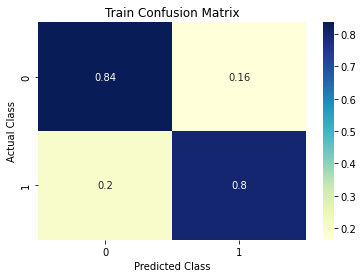

In [ ]:
cm_tr1=perc_cm(cm_tr)
ax = sns.heatmap(cm_tr1,annot=True,cmap="YlGnBu")
ax.set(xlabel ="Predicted Class", ylabel = "Actual Class", title ='Train Confusion Matrix')

[Text(33.0, 0.5, 'Actual Class'),
 Text(0.5, 15.0, 'Predicted Class'),
 Text(0.5, 1.0, 'Train Confusion Matrix')]

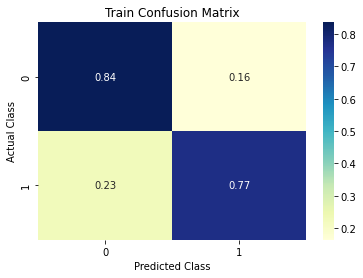

In [ ]:
cm_te1=perc_cm(cm_te)
ax = sns.heatmap(cm_te1,annot=True,cmap="YlGnBu")
ax.set(xlabel ="Predicted Class", ylabel = "Actual Class", title ='Train Confusion Matrix')

In [ ]:
Y_pred_te[1]

array([0.99487503, 0.00512497])

In [ ]:
X_te_bias=X_test[identity_columns]
X_te_bias['y_pred']=Y_pred_te[:,1]
X_te_bias['y']=y_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
identity_columns1=['latino','transgender','asian','psychiatric_or_mental_illness','jewish','homosexual_gay_or_lesbian',
                  'black','muslim','white','christian','male','female']

In [ ]:
SUBGROUP_AUC = 'subgroup_auc'
BPSN_AUC = 'bpsn_auc'  # stands for background positive, subgroup negative
BNSP_AUC = 'bnsp_auc'  # stands for background negative, subgroup positive

def compute_auc(y_true, y_pred):
    try:
        return metrics.roc_auc_score(y_true, y_pred)
    except ValueError:
        return np.nan

def compute_subgroup_auc(df, subgroup):
    subgroup_examples = df[df[subgroup]==1]
    return compute_auc(subgroup_examples['y'], subgroup_examples['y_pred'])

def compute_bpsn_auc(df, subgroup):
    """Computes the AUC of the within-subgroup negative examples and the background positive examples."""
    subgroup_negative_examples = df[df[subgroup]==1]
    subgroup_negative_examples = subgroup_negative_examples[subgroup_negative_examples['y']==0]
    non_subgroup_positive_examples = df[df[subgroup]==0]
    non_subgroup_positive_examples = non_subgroup_positive_examples[non_subgroup_positive_examples['y']==1]
    examples = subgroup_negative_examples.append(non_subgroup_positive_examples)
    return compute_auc(examples['y'], examples['y_pred'])

def compute_bnsp_auc(df, subgroup):
    """Computes the AUC of the within-subgroup positive examples and the background negative examples."""
    subgroup_positive_examples = df[df[subgroup]==1]
    subgroup_positive_examples = subgroup_positive_examples[subgroup_positive_examples['y']==1]
    non_subgroup_negative_examples = df[df[subgroup]==0]
    non_subgroup_negative_examples = non_subgroup_negative_examples[non_subgroup_negative_examples['y']==0]
    examples = subgroup_positive_examples.append(non_subgroup_negative_examples)
    return compute_auc(examples['y'], examples['y_pred'])

def compute_bias_metrics_for_model(dataset,
                                   subgroups,
                                   include_asegs=False):
    """Computes per-subgroup metrics for all subgroups and one model."""
    records = []
    for subgroup in subgroups:
        record = {'subgroup': subgroup,'subgroup_size': len(dataset[dataset[subgroup]==1])}
        record[SUBGROUP_AUC] = compute_subgroup_auc(dataset, subgroup)
        record[BPSN_AUC] = compute_bpsn_auc(dataset, subgroup)
        record[BNSP_AUC] = compute_bnsp_auc(dataset, subgroup)
        records.append(record)
    return pd.DataFrame(records).sort_values('subgroup_size', ascending=True)

In [ ]:
bias_metrics_df = compute_bias_metrics_for_model(X_te_bias, identity_columns1)
bias_metrics_df

,subgroup,subgroup_size,subgroup_auc,bpsn_auc,bnsp_auc
0,latino,685,0.787630,0.719491,0.898125
1,transgender,883,0.764576,0.736124,0.870848
2,asian,1624,0.812762,0.841650,0.819223
3,psychiatric_or_mental_illness,1673,0.838795,0.810859,0.886334
4,jewish,2688,0.799956,0.716004,0.911405
5,homosexual_gay_or_lesbian,3752,0.743978,0.674136,0.901248
6,black,5116,0.718347,0.575867,0.933006
7,muslim,7427,0.747050,0.638703,0.926765
8,white,8675,0.730169,0.550451,0.949861
9,christian,13923,0.848052,0.859832,0.833408


In [ ]:
bias_score=score(bias_metrics_df,0.859)

In [ ]:
def score(df,overall_auc):
    l=len(df)
    x=df.drop(['subgroup','subgroup_size'],axis=1)
    x=x.apply((lambda x: x**(-5)),axis=1)
    s=x.sum(axis=0)
    s=s.apply(lambda x: (x/l)**(1/(-5)))
    s=s.sum(axis=0)
    score=0.25*(s+overall_auc)
    return score    

In [ ]:
bias_score=score(bias_metrics_df,0.859)

In [ ]:
bias_score

0.802485906402565

In [ ]:
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10,50,100,500],'fit_prior':[True,False]}
NB = MultinomialNB()
clf = GridSearchCV(NB, parameters,scoring='roc_auc',cv=10)
clf.fit(X_tr2,y_train_scraped)

GridSearchCV(cv=10, estimator=MultinomialNB(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 50, 100,
                                   500],
                         'fit_prior': [True, False]},
             scoring='roc_auc')

In [ ]:
clf.best_estimator_

MultinomialNB(alpha=1, fit_prior=False)

In [ ]:
NB = MultinomialNB(alpha=1,fit_prior=True)
NB.fit(X_tr2,y_train_scraped)
Y_pred_tr=NB.predict_proba(X_tr2)

In [ ]:
Y_pred_te=NB.predict_proba(X_te2)

In [ ]:
roc_auc_score(y_train_scraped, Y_pred_tr[:,1])

0.8776027204560093

In [ ]:
roc_auc_score(y_test, Y_pred_te[:,1])

0.859233628044739

In [ ]:
X_te_bias=X_test[identity_columns]
X_te_bias['y_pred']=Y_pred_te[:,1]
X_te_bias['y']=y_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
bias_metrics_df = compute_bias_metrics_for_model(X_te_bias, identity_columns1)
bias_metrics_df

,subgroup,subgroup_size,subgroup_auc,bpsn_auc,bnsp_auc
0,latino,685,0.791262,0.734553,0.889351
1,transgender,883,0.766323,0.754182,0.858429
2,asian,1624,0.813035,0.851801,0.805722
3,psychiatric_or_mental_illness,1673,0.841340,0.818838,0.881022
4,jewish,2688,0.802509,0.737441,0.899470
5,homosexual_gay_or_lesbian,3752,0.747793,0.695553,0.891025
6,black,5116,0.719381,0.581493,0.931172
7,muslim,7427,0.751407,0.651339,0.923177
8,white,8675,0.731557,0.556051,0.948580
9,christian,13923,0.847852,0.865210,0.826662


In [ ]:
bias_score=score(bias_metrics_df,0.8592)

In [ ]:
bias_score

0.8036860803879485

# TfIdf

In [ ]:
vectorizer = TfidfVectorizer()
tfidf_vect = vectorizer.fit(X_train['clean_text'])

In [ ]:
f = open('/content/drive/MyDrive/vetorizer.pickle', 'wb')
pickle.dump(vectorizer1, f)
f.close()

In [ ]:
X_train_tfidf_feature=tfidf_vect.transform(X_train['clean_text'])
X_test_tfidf_feature=tfidf_vect.transform(X_test['clean_text'])

In [ ]:
vectorizer1 = TfidfVectorizer()
vectorizer1.fit(X_train_scrapped['clean_text'])

TfidfVectorizer()

In [ ]:
X_train_scraped_tfidf_feature=vectorizer1.transform(X_train_scrapped['clean_text'])
X_test_scraped_tfidf_feature=vectorizer1.transform(X_test['clean_text'])

In [ ]:
X_tr1 = hstack((X_train1, X_train_tfidf_feature)).tocsr()
X_te1 = hstack((X_test1, X_test_tfidf_feature)).tocsr()
X_tr2 = hstack((X_train2, X_train_scraped_tfidf_feature)).tocsr()
X_te2 = hstack((X_test1, X_test_scraped_tfidf_feature)).tocsr()

In [ ]:
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10,50,100,500]}
NB = MultinomialNB(fit_prior=True)
clf = GridSearchCV(NB, parameters,cv=10,scoring='roc_auc')
clf.fit(X_tr1,y_train)

In [ ]:
clf.best_estimator_

In [ ]:
NB = MultinomialNB(alpha=0.1,fit_prior=True)
NB.fit(X_tr1,y_train)
Y_pred_tr=NB.predict_proba(X_tr1)

In [ ]:
Y_pred_te=NB.predict_proba(X_te1)

In [ ]:
roc_auc_score(y_train, Y_pred_tr[:,1])

0.912437475010464

In [ ]:
roc_auc_score(y_test, Y_pred_te[:,1])

0.8694390746912724

In [ ]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, Y_pred_tr[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, Y_pred_te[:,1])

In [ ]:
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
cm_tr=confusion_matrix(y_train, predict_with_best_t(Y_pred_tr[:,1], best_t))
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(Y_pred_tr[:,1], best_t)))
cm_te=confusion_matrix(y_test, predict_with_best_t(Y_pred_te[:,1], best_t))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(Y_pred_te[:,1], best_t)))

the maximum value of tpr*(1-fpr) 0.702730110078237 for threshold 0.089
Train confusion matrix
[[916974 148432]
 [ 17187  76466]]
Test confusion matrix
[[492707  80974]
 [ 13662  36766]]


In [ ]:
def perc_cm(cm):
    cm1=[]
    r1=[]
    r2=[]
    for i in range(2):
        if i == 0:
            for j in cm[i]:
                k=j/np.sum(cm[i])
                r1.append(k)
        if i ==1:
            for j in cm[i]:
                k=j/np.sum(cm[i])
                r2. append(k)
    cm1.append(r1)
    cm1.append(r2)
    return cm1

[Text(33.0, 0.5, 'Actual Class'),
 Text(0.5, 15.0, 'Predicted Class'),
 Text(0.5, 1.0, 'Train Confusion Matrix')]

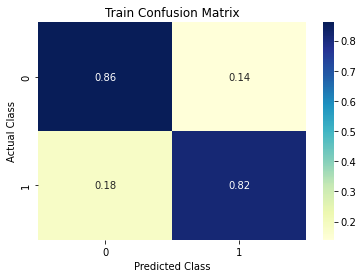

In [ ]:
cm_tr1=perc_cm(cm_tr)
ax = sns.heatmap(cm_tr1,annot=True,cmap="YlGnBu")
ax.set(xlabel ="Predicted Class", ylabel = "Actual Class", title ='Train Confusion Matrix')

[Text(33.0, 0.5, 'Actual Class'),
 Text(0.5, 15.0, 'Predicted Class'),
 Text(0.5, 1.0, 'Test Confusion Matrix')]

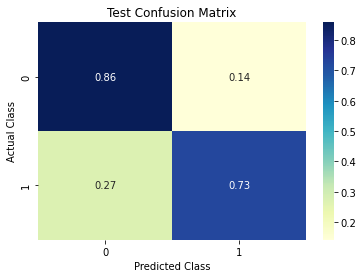

In [ ]:
cm_te1=perc_cm(cm_te)
ax = sns.heatmap(cm_te1,annot=True,cmap="YlGnBu")
ax.set(xlabel ="Predicted Class", ylabel = "Actual Class", title ='Test Confusion Matrix')

In [ ]:
X_te_bias=X_test[identity_columns]
X_te_bias['y_pred']=Y_pred_te[:,1]
X_te_bias['y']=y_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
bias_metrics_df = compute_bias_metrics_for_model(X_te_bias, identity_columns1)
bias_metrics_df

,subgroup,subgroup_size,subgroup_auc,bpsn_auc,bnsp_auc
0,latino,685,0.796910,0.787833,0.873794
1,transgender,883,0.777241,0.775410,0.874355
2,asian,1624,0.823913,0.871480,0.819341
3,psychiatric_or_mental_illness,1673,0.861310,0.810478,0.912950
4,jewish,2688,0.815299,0.784804,0.896853
5,homosexual_gay_or_lesbian,3752,0.769585,0.744375,0.895305
6,black,5116,0.769479,0.720347,0.909816
7,muslim,7427,0.777812,0.731015,0.910978
8,white,8675,0.766481,0.687734,0.924556
9,christian,13923,0.852936,0.888223,0.826021


In [ ]:
bias_score=score(bias_metrics_df,0.8694)
print(bias_score)

0.8323394740676506


In [ ]:
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10,50,100,500],'fit_prior':[True,False]}
NB = MultinomialNB()
clf = GridSearchCV(NB, parameters,scoring='roc_auc',cv=10)
clf.fit(X_tr2,y_train_scraped)

GridSearchCV(cv=10, estimator=MultinomialNB(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 50, 100,
                                   500],
                         'fit_prior': [True, False]},
             scoring='roc_auc')

In [ ]:
clf.best_estimator_

MultinomialNB(alpha=0.1)

In [ ]:
NB = MultinomialNB(alpha=0.1,fit_prior=True)
NB.fit(X_tr2,y_train_scraped)
Y_pred_tr=NB.predict_proba(X_tr2)

In [ ]:
Y_pred_te=NB.predict_proba(X_te2)

In [ ]:
roc_auc_score(y_train_scraped, Y_pred_tr[:,1])

0.9126227643638636

In [ ]:
roc_auc_score(y_test, Y_pred_te[:,1])

0.8693233240524082

In [ ]:
X_te_bias=X_test[identity_columns]
X_te_bias['y_pred']=Y_pred_te[:,1]
X_te_bias['y']=y_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
bias_metrics_df = compute_bias_metrics_for_model(X_te_bias, identity_columns1)
bias_metrics_df

,subgroup,subgroup_size,subgroup_auc,bpsn_auc,bnsp_auc
0,latino,685,0.801634,0.803376,0.865803
1,transgender,883,0.780010,0.797891,0.859685
2,asian,1624,0.827656,0.882099,0.807807
3,psychiatric_or_mental_illness,1673,0.862000,0.820280,0.906854
4,jewish,2688,0.816990,0.806358,0.882089
5,homosexual_gay_or_lesbian,3752,0.771044,0.767886,0.880594
6,black,5116,0.770112,0.725476,0.907178
7,muslim,7427,0.780949,0.743383,0.905554
8,white,8675,0.766598,0.692639,0.921978
9,christian,13923,0.852703,0.893812,0.816992


In [ ]:
bias_score=score(bias_metrics_df,0.8693)

In [ ]:
bias_score

0.8334415914615717

In [ ]:
import pickle 
f = open('/content/drive/MyDrive/NB_classifier.pickle', 'wb')
pickle.dump(NB, f)
f.close()

In [ ]:
clf = pickle.load(open('/content/drive/MyDrive/NB_classifier.pickle', 'rb'))

In [ ]:
clf.predict_proba(X_te2[0,:])

array([[0.95717772, 0.04282228]])

In [ ]:
x = PrettyTable()
x.field_names = ['Feature',"Train AUC", "Test AUC", "Bias_Score"]
x.add_rows(
    [
        ["BoW", 0.8770, 0.8592, 0.8024],
        ["BoW with scraped data", 0.8776, 0.8592, 0.8036],
        ["TfIdf", 0.9124, 0.8694, 0.8323],
        ["TfIdf with scraped data", 0.9126, 0.8693, 0.8334]
        
      
    ]
)

In [ ]:
print(x)

+-------------------------+-----------+----------+------------+
|         Feature         | Train AUC | Test AUC | Bias_Score |
+-------------------------+-----------+----------+------------+
|           BoW           |   0.877   |  0.8592  |   0.8024   |
|  BoW with scraped data  |   0.8776  |  0.8592  |   0.8036   |
|          TfIdf          |   0.9124  |  0.8694  |   0.8323   |
| TfIdf with scraped data |   0.9126  |  0.8693  |   0.8334   |
+-------------------------+-----------+----------+------------+
